# Importo librerias

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargo los datos

In [7]:
data = pd.read_csv('/Marcos/Proyectos/Netflix - PD/netflix_dataset.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Cantidad de peliculas y series de la plataforma

In [10]:
total_prod = data['type'].value_counts()

# Movie      6131
# TV Show    2676
# Se evidencia mayor cantidad de peliculas

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\273354396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['type'], data=data, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

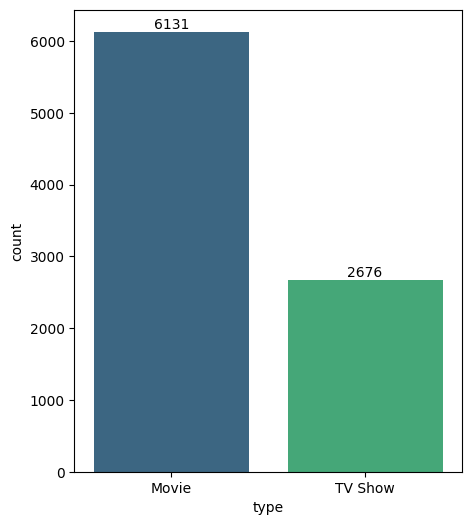

In [55]:
plt.figure(figsize=(5,6))

sns.countplot(x=data['type'], data=data, palette="viridis")

for i, count in enumerate(total_prod):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show

# Clasificacion con mas producciones

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\1985942582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['rating'], data=data, palette='viridis', order=order)


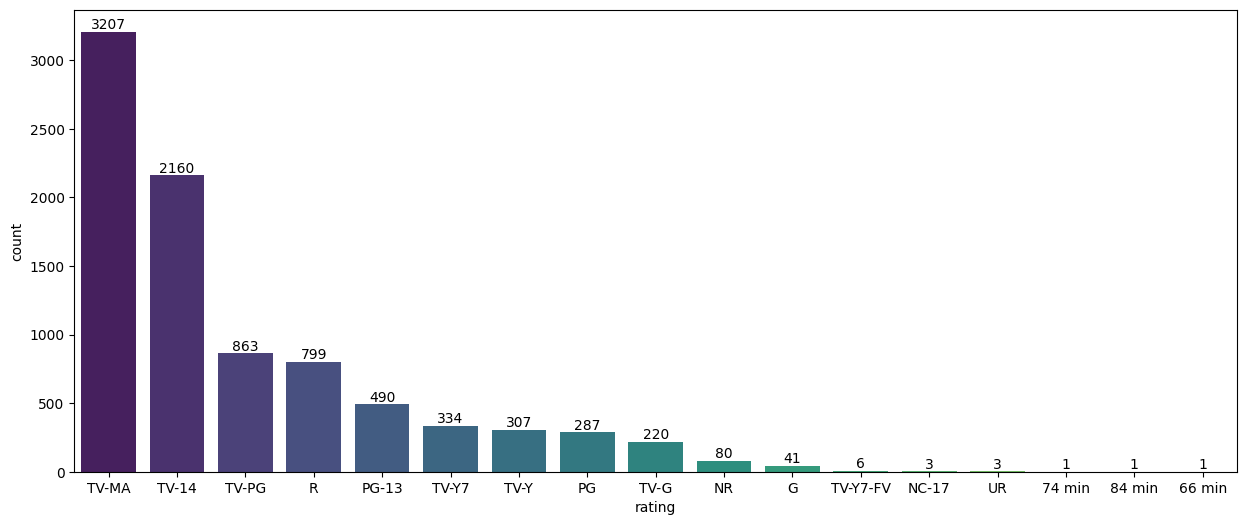

In [54]:
plt.figure(figsize=(15, 6))
count_data = data['rating'].value_counts()
order = count_data.sort_values(ascending=False).index
sns.countplot(x=data['rating'], data=data, palette='viridis', order=order)
for i, count in enumerate(count_data):
    plt.text(i, count, str(count),ha='center', va='bottom')

plt.show()


## Cantidad de peliculas y series por clasificacion

<function matplotlib.pyplot.show(close=None, block=None)>

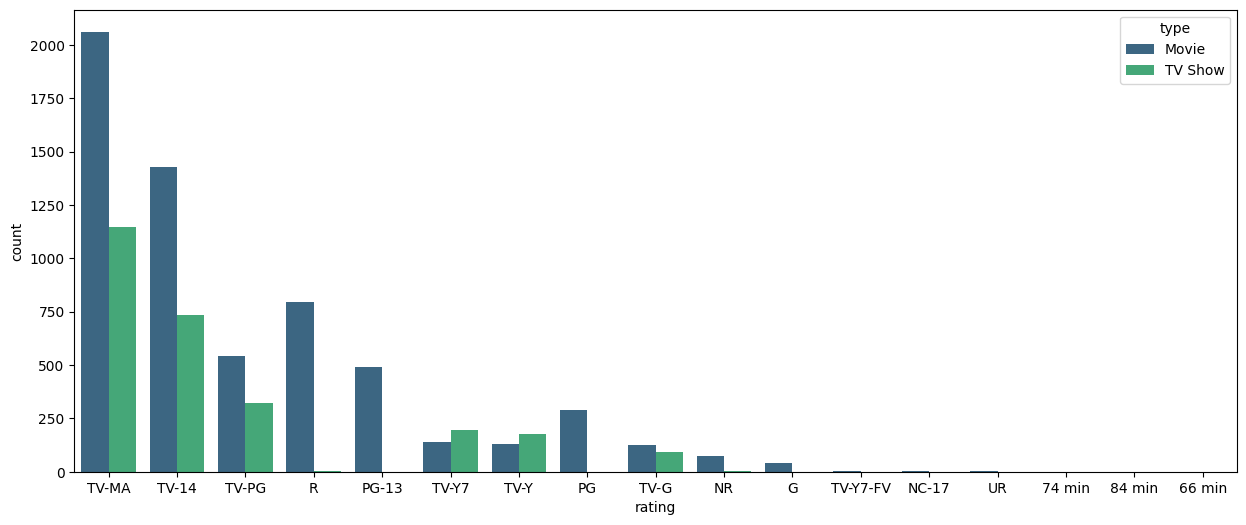

In [53]:
plt.figure(figsize=(15, 6))

sns.countplot(x=data['rating'], data=data, palette='viridis', hue=data['type'], order=order)

plt.show

## Agrupo peliculas

In [20]:
data_movie = data[data['type'] == 'Movie']

## Directores por peliculas

In [22]:
data_director = data_movie['director'].value_counts()
data_director

director
Rajiv Chilaka                 19
Raúl Campos, Jan Suter        18
Suhas Kadav                   16
Marcus Raboy                  15
Jay Karas                     14
                              ..
Dennis Rovira van Boekholt     1
Naoto Amazutsumi               1
Jenny Gage                     1
Kaila York                     1
Mozez Singh                    1
Name: count, Length: 4354, dtype: int64

Creo df par mejorar visualizacion de los datos

In [23]:
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,15
Jay Karas,14


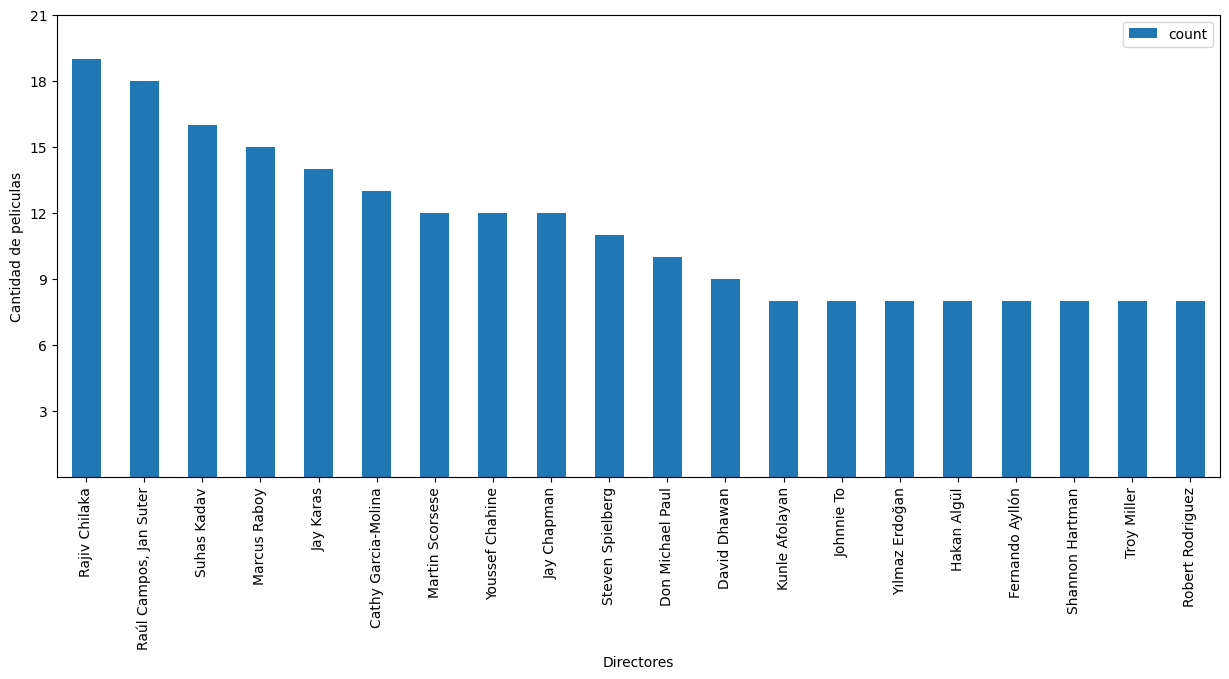

In [33]:
data_directorFrame[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de peliculas')
plt.xlabel('Directores')
plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

## Actores con mayor cantidad de peliculas

In [35]:
data_movie_actor = data_movie.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_movie_actor = pd.DataFrame(data_movie_actor)
data_movie_actor.head()

,0
title,
My Little Pony: A New Generation,Vanessa Hudgens
My Little Pony: A New Generation,Kimiko Glenn
My Little Pony: A New Generation,James Marsden
My Little Pony: A New Generation,Sofia Carson
My Little Pony: A New Generation,Liza Koshy


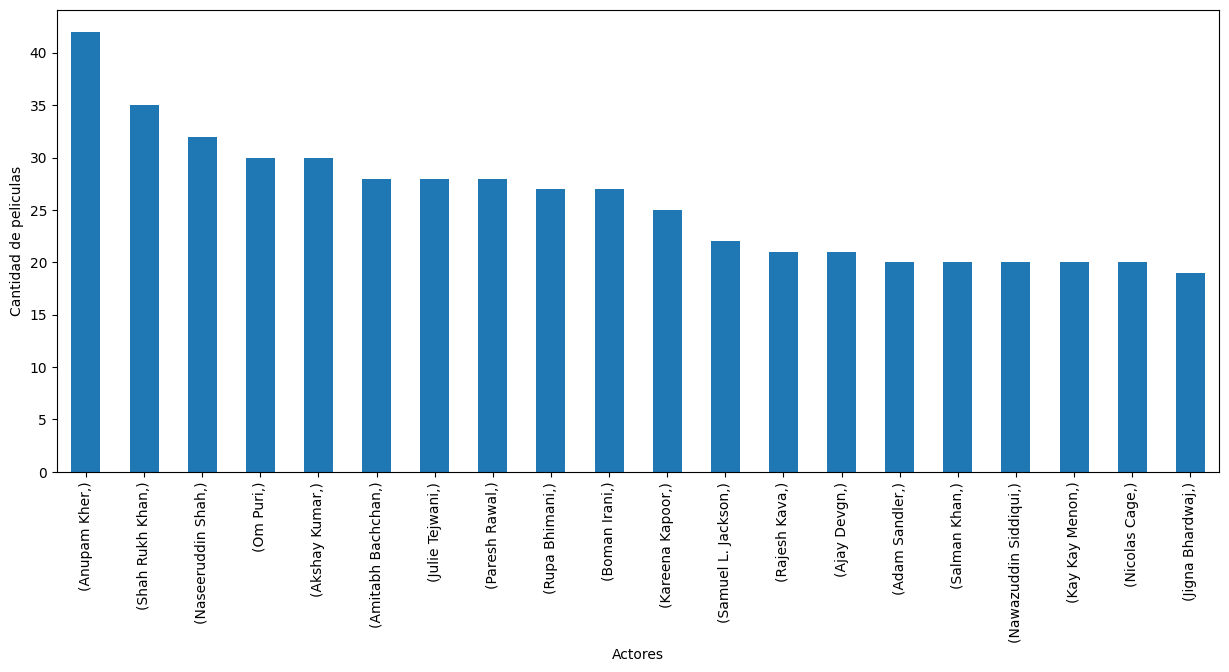

In [36]:
top_actors_movie = data_movie_actor.value_counts()

top_actors_movie[:20].plot(kind='bar', figsize=[15,6])

plt.ylabel('Cantidad de peliculas')
plt.xlabel('Actores')
##plt.yticks([3, 6, 9, 12, 15, 18, 21])

plt.show()

## Top generos por pelicula

In [37]:
data_movie_list_in = data_movie.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_movie_list_in.head()

title
Dick Johnson Is Dead                           Documentaries
My Little Pony: A New Generation    Children & Family Movies
Sankofa                                               Dramas
Sankofa                                   Independent Movies
Sankofa                                 International Movies
dtype: object

In [39]:
top_listed_in = data_movie_list_in.value_counts()
top_listed_in

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Horror Movies                357
Stand-Up Comedy              343
Sci-Fi & Fantasy             243
Sports Movies                219
Classic Movies               116
LGBTQ Movies                 102
Anime Features                71
Cult Movies                   71
Faith & Spirituality          65
Movies                        57
Name: count, dtype: int64

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\3757912013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = data_movie_list_in, order=data_movie_list_in.value_counts().index[:20],palette='viridis')


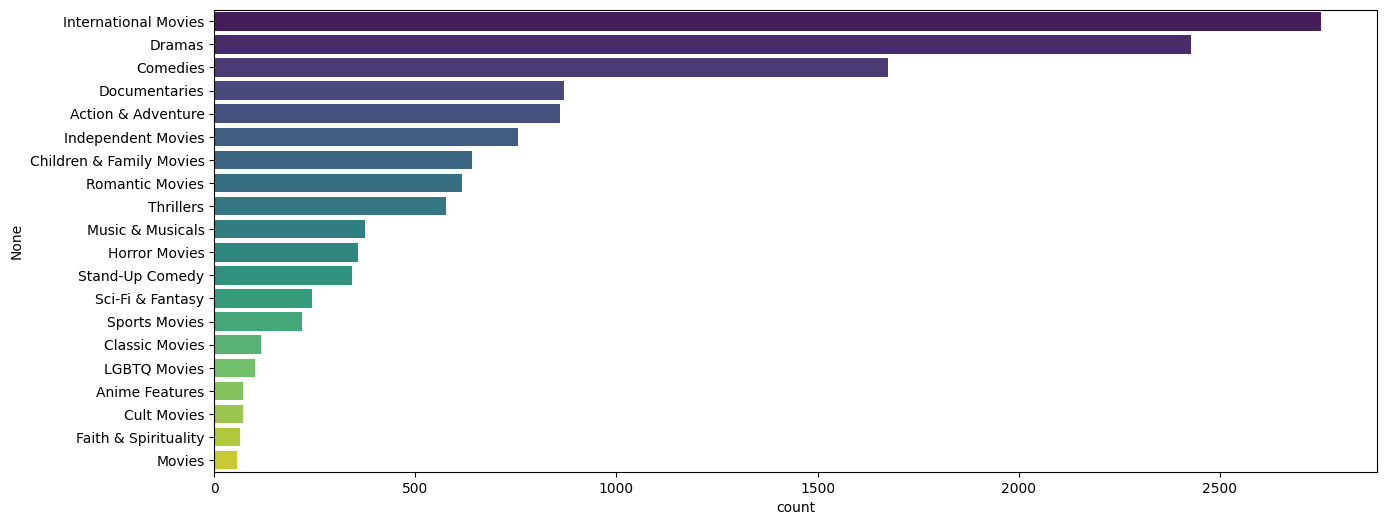

In [57]:
plt.figure(figsize=(15,6))

sns.countplot(y = data_movie_list_in, order=data_movie_list_in.value_counts().index[:20],palette='viridis')

plt.show()

## Peliculas por año con mayor produccion


C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\437314179.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_movie['release_year'], data=data_movie, palette='viridis')


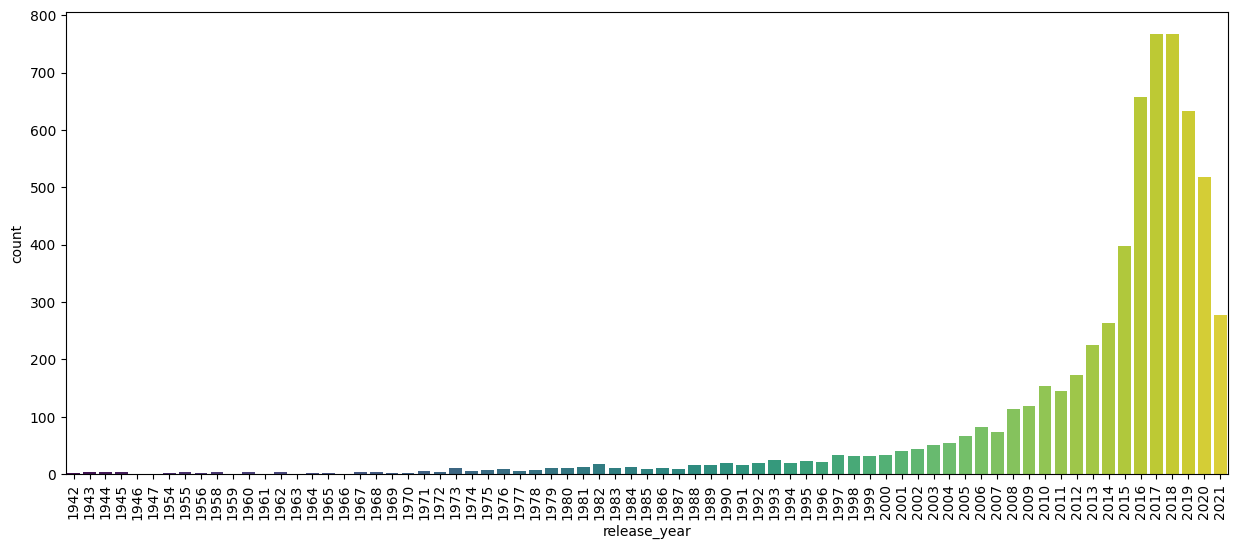

In [60]:
plt.figure(figsize=(15,6))

sns.countplot(x=data_movie['release_year'], data=data_movie, palette='viridis')

plt.xticks(rotation=90)
plt.show()

## Pais de mayor produccion

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\1532526715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='country', data=data_movie, order=data_movie['country'].value_counts().index[:10], palette='viridis')


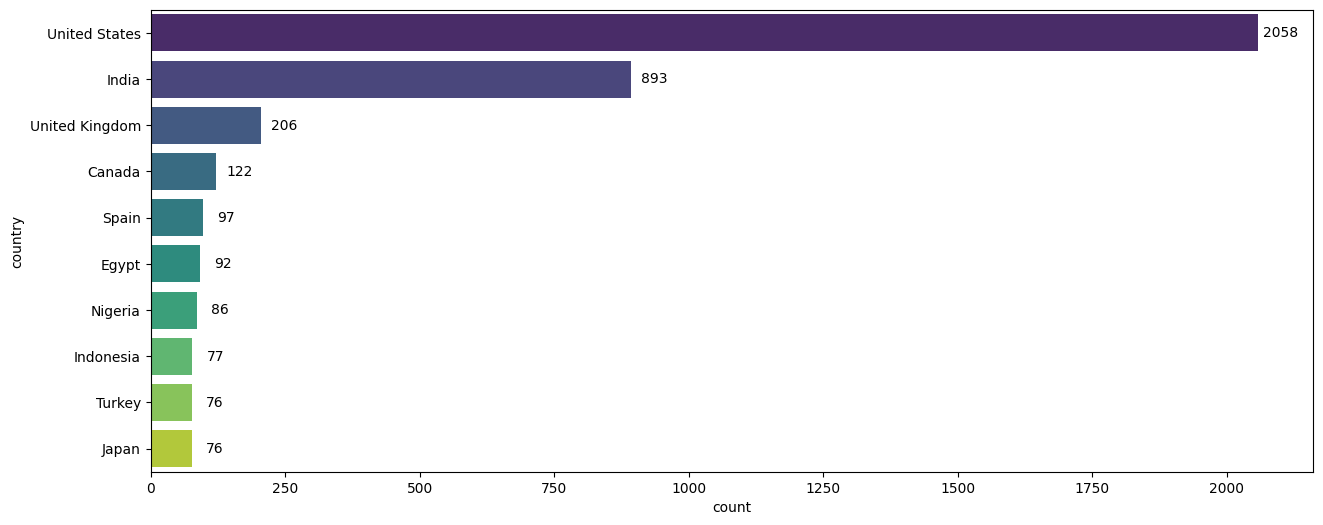

In [72]:
plt.figure(figsize=(15, 6))

ax = sns.countplot(y='country', data=data_movie, order=data_movie['country'].value_counts().index[:10], palette='viridis')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 30, p.get_y() + p.get_height() / 2), ha="center", va='center', xytext=(5, 0), textcoords='offset points')

plt.show()

## Ordenamos directores de series

In [73]:
data_tv = data[data['type'] == 'TV Show']

# Top directores por series

In [74]:
data_director = data_tv['director'].value_counts()
data_directorFrame = pd.DataFrame(data_director)
data_directorFrame.head()

,count
director,
Alastair Fothergill,3
Rob Seidenglanz,2
Hsu Fu-chun,2
Iginio Straffi,2
Shin Won-ho,2


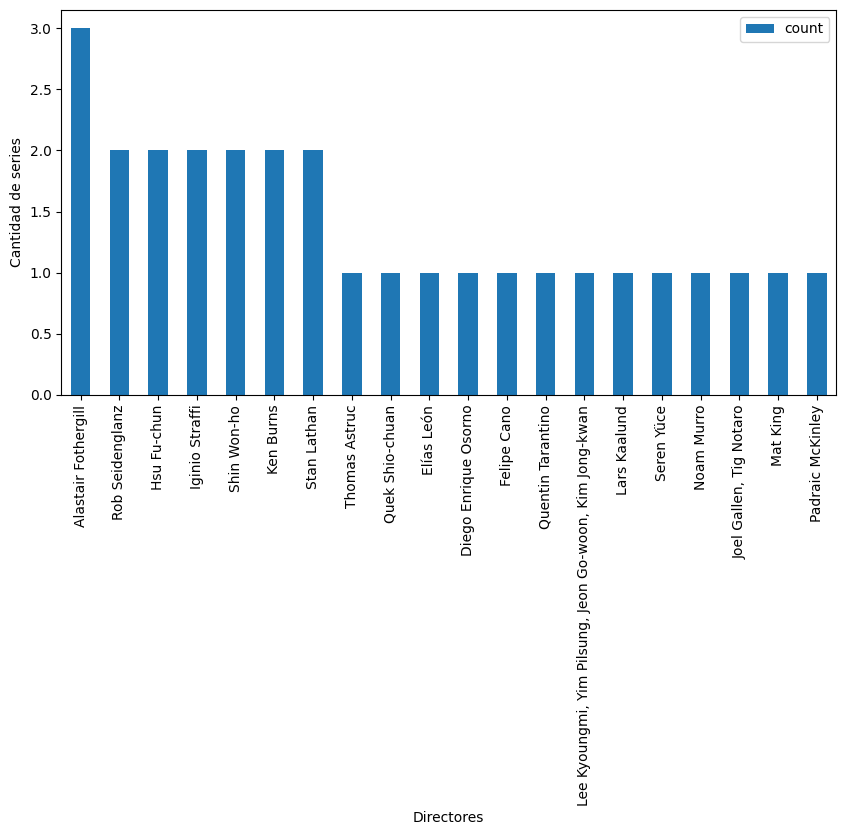

In [76]:
data_directorFrame[:20].plot(kind='bar', figsize=[10,5])
plt.ylabel('Cantidad de series')
plt.xlabel('Directores')
plt.show()

## Actores con mas series

In [77]:
data_tv_actor = data_tv.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
data_tv_actor = pd.DataFrame(data_tv_actor)
data_tv_actor.head()

,0
title,
Blood & Water,Ama Qamata
Blood & Water,Khosi Ngema
Blood & Water,Gail Mabalane
Blood & Water,Thabang Molaba
Blood & Water,Dillon Windvogel


In [85]:
top_actors_tv = data_tv_actor.value_counts()
top_actors_tv

Takahiro Sakurai         25
Yuki Kaji                19
Junichi Suwabe           17
Daisuke Ono              17
Ai Kayano                17
                         ..
Ivy Yin                   1
Iván Pellicer             1
Iván Álvarez de Araya     1
Iza Moreira               1
Şükrü Özyıldız            1
Name: count, Length: 14863, dtype: int64

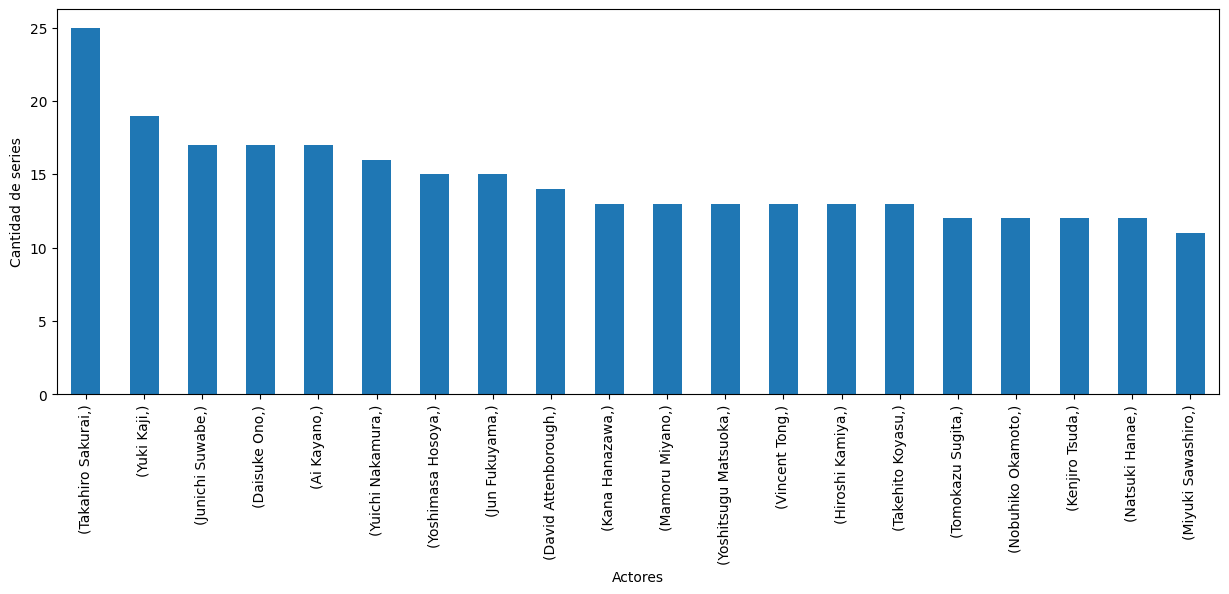

In [90]:
top_actors_tv[:20].plot(kind='bar', figsize=[15,5])
plt.ylabel('Cantidad de series')
plt.xlabel('Actores')
plt.show()

## Producciones por año

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\3970615786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_tv['release_year'], data=data_tv, palette='viridis')


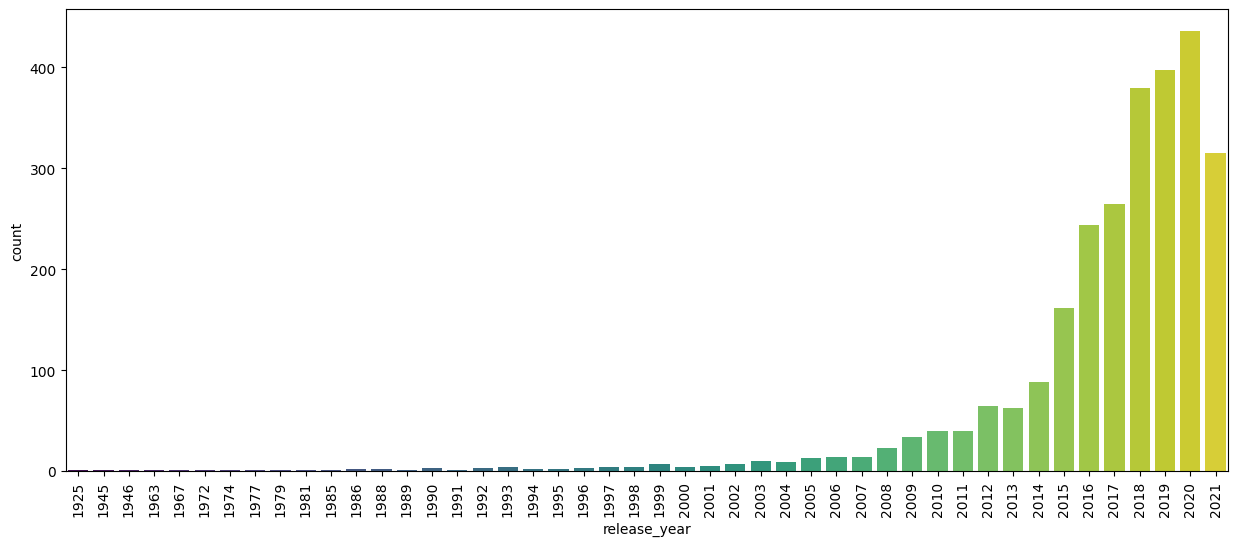

In [95]:

plt.figure(figsize=(15,6))
sns.countplot(x=data_tv['release_year'], data=data_tv, palette='viridis')

plt.xticks(rotation=90)
plt.show()

# Producciones por pais

C:\Users\Marcos\AppData\Local\Temp\ipykernel_17212\2420388146.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='country', data=data_tv, order=data_tv['country'].value_counts().index[:10], palette='viridis')


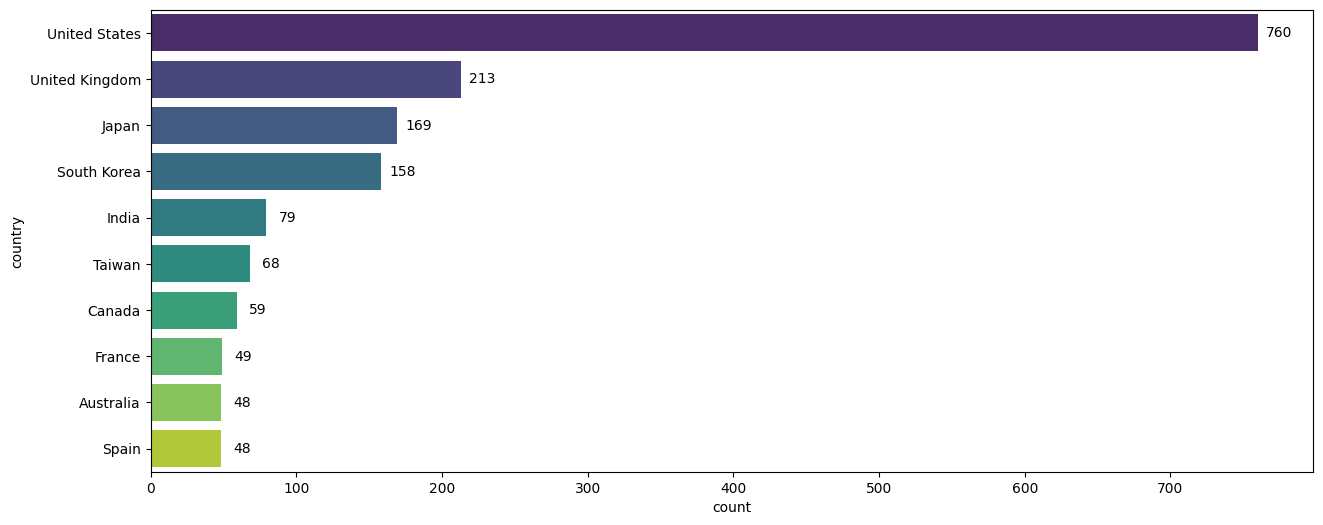

In [97]:

plt.figure(figsize=(15,6))

ax = sns.countplot(y='country', data=data_tv, order=data_tv['country'].value_counts().index[:10], palette='viridis')

for p in ax.patches:
  ax.annotate(format(p.get_width(), '.0f'), (p.get_width() + 10, p.get_y() + p.get_height() / 2),
            ha="center", va='center', xytext = (5, 0), textcoords='offset points')
  


plt.show()